# M504 AI and Applications

## Topic: Hotel Booking Demand - Hotel reservations including cancellations, booking dates, lead time.

## Link to the dataset📂: https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction/data

## Company: BookIt.com

### Business Context:
Our client is a medium-sized hotel chain wanting to improve its booking and cancellation management system. Their dataset contains detailed reservation records, such as number of guests, booking dates, special requests, price per night, and whether the booking was eventually canceled.

### Why Do They Need a Data Scientist? 🚀

The hotel has recently seen a high amount of exhibit cancellations and this, in turn, has led to not only unpredictability in revenue streams but also to the inefficient room allocation. They need data driven insights to:

* Identify what's causing cancellations.
* Forecast the likely number of the bookings to be called off.
* Adapt pricing and policies in such a way as to decrease revenue loss.

How Can This Analysis Help? 🔍
Through EDA, we will:

✅ Clean and preprocess the dataset to make it ready to use.  
✅ Determine customer behavior patterns that lead to cancellations.  
✅ Answers key business questions to help business make smart choices.

By the end of this analysis, the hotel will have made sound decisions about customer policies, rates, and reservation management fewer financial shocks and more customer satisfaction.💡

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load and read the dataset

In [2]:
file_path = "booking.csv"
df = pd.read_csv(file_path)

### Checking the shape of the dataframe and column names respectively

In [3]:
print(df.shape)

(36285, 17)


In [4]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

### Dropping 'ID' column and display the first 5 rows of the data

In [5]:
df.drop(["Booking_ID"], axis=1, inplace=True)
df.index = df.index + 1
print(df.shape)
df.head()

(36285, 16)


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
1,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
2,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
3,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
5,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


### Data types information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 1 to 36285
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

### Check for unique values

In [7]:
df = df[sorted(df.columns)]

unique_values = df.nunique()
print(unique_values)

P-C                            9
P-not-C                       59
average price               3930
booking status                 2
car parking space              2
date of reservation          553
lead time                    352
market segment type            5
number of adults               5
number of children             6
number of week nights         18
number of weekend nights       8
repeated                       2
room type                      7
special requests               6
type of meal                   4
dtype: int64


### Check if there is null values - Here we have zero null values

In [8]:
print(df.isnull().sum().sort_values(ascending=True))

P-C                         0
P-not-C                     0
average price               0
booking status              0
car parking space           0
date of reservation         0
lead time                   0
market segment type         0
number of adults            0
number of children          0
number of week nights       0
number of weekend nights    0
repeated                    0
room type                   0
special requests            0
type of meal                0
dtype: int64


### Converting 'date of reservation' to datetime format which ensures proper date handling and fixes any parsing errors

In [9]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

### Summary statistics of numerical columns

In [10]:
print(df.describe())

                P-C       P-not-C  average price  car parking space  \
count  36285.000000  36285.000000   36285.000000       36285.000000   
mean       0.023343      0.153369     103.421636           0.030977   
min        0.000000      0.000000       0.000000           0.000000   
25%        0.000000      0.000000      80.300000           0.000000   
50%        0.000000      0.000000      99.450000           0.000000   
75%        0.000000      0.000000     120.000000           0.000000   
max       13.000000     58.000000     540.000000           1.000000   
std        0.368281      1.753931      35.086469           0.173258   

                 date of reservation     lead time  number of adults  \
count                          36248  36285.000000      36285.000000   
mean   2018-05-24 15:28:31.410284544     85.239851          1.844839   
min              2015-10-02 00:00:00      0.000000          0.000000   
25%              2018-02-28 00:00:00     17.000000          2.000000   


### Identify potential outliers using boxplots (Before removing outliers)

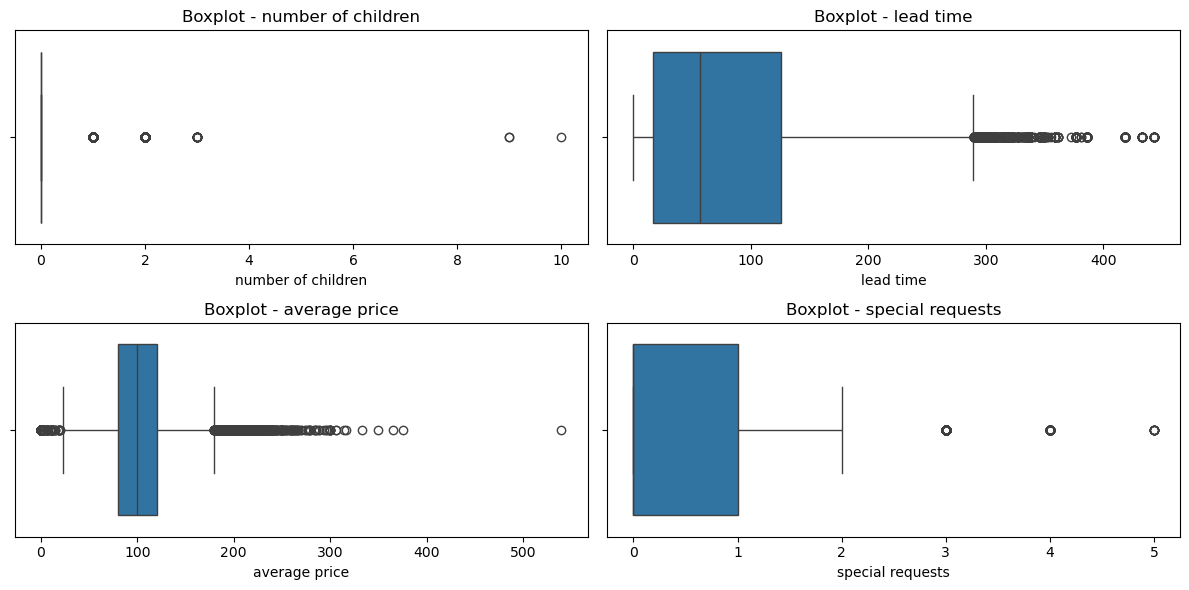

In [11]:
features = ["number of children", "lead time", "average price", "special requests"]
plt.figure(figsize=(12, 6))

for idx, feature in enumerate(features, start=1):
    plt.subplot(2, 2, idx)
    sns.boxplot(data=df, x=feature, showfliers=True)
    plt.title(f"Boxplot - {feature}")

plt.tight_layout()
plt.show()

####  Removing extreme outliers based on predefined thresholds
#### 'number of children' has a max of 10, filtering to max 5
#### 'Lead time' is kept to 365 assuming there are less chances of more than 1 year
#### Similarly 'Average price' is set to 500 to filter out extreme cases

In [12]:
df = df[df["number of children"] <= 5]

df = df[df["lead time"] <= 365]

df = df[df["average price"] < 500]

### Identify potential outliers using boxplots (After removing outliers)

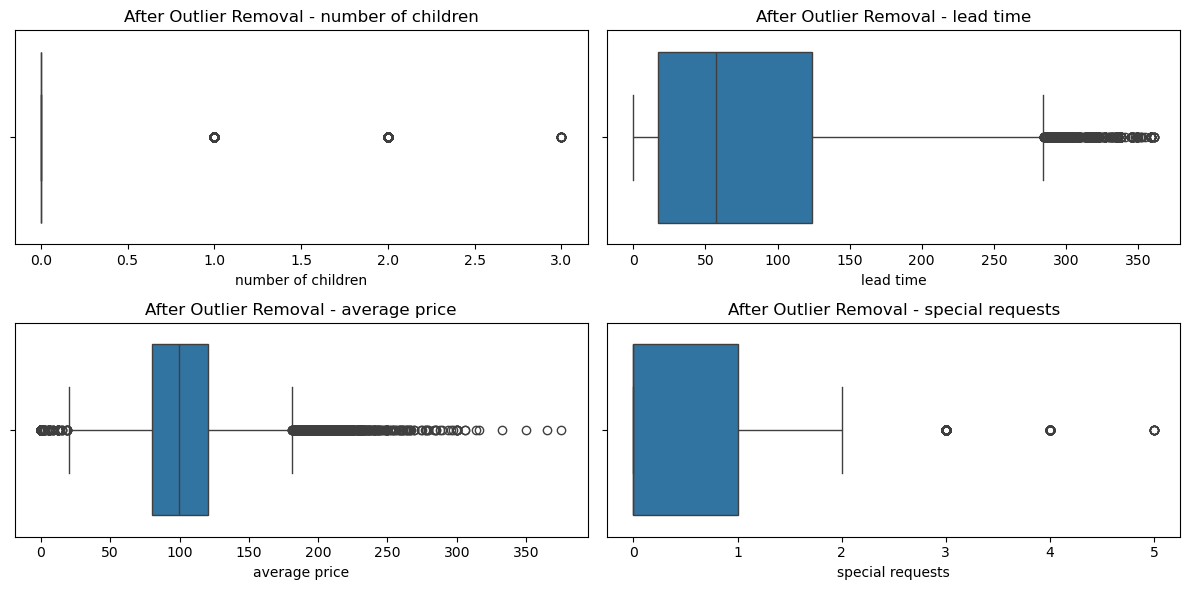

In [13]:
plt.figure(figsize=(12, 6))

for idx, feature in enumerate(features, start=1):
    plt.subplot(2, 2, idx)
    sns.boxplot(data=df, x=feature, showfliers=True)
    plt.title(f"After Outlier Removal - {feature}")

plt.tight_layout()
plt.show()


### A visulization of barplot showing Booking status distribution of Not_Canceled vs Canceled

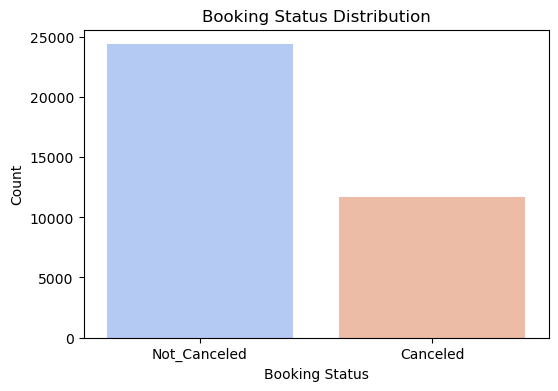

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["booking status"], palette="coolwarm")
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()

### Below is a histogram with a KDE overlay to visualize the distribution and showing the frequency and density of lead time

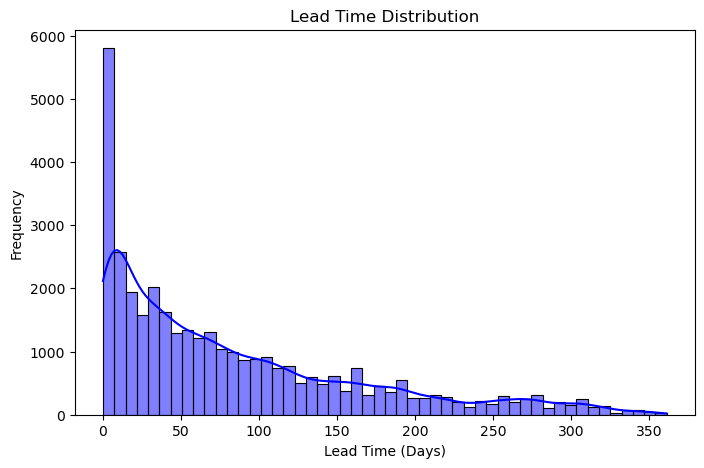

In [15]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(data=df, x="lead time", bins=50, kde=True, edgecolor="black", color="blue")
ax.set(title="Lead Time Distribution", xlabel="Lead Time (Days)", ylabel="Frequency")
plt.show()

### Here is a visualization of room type distribution just to get an idea of how rooms are assigned

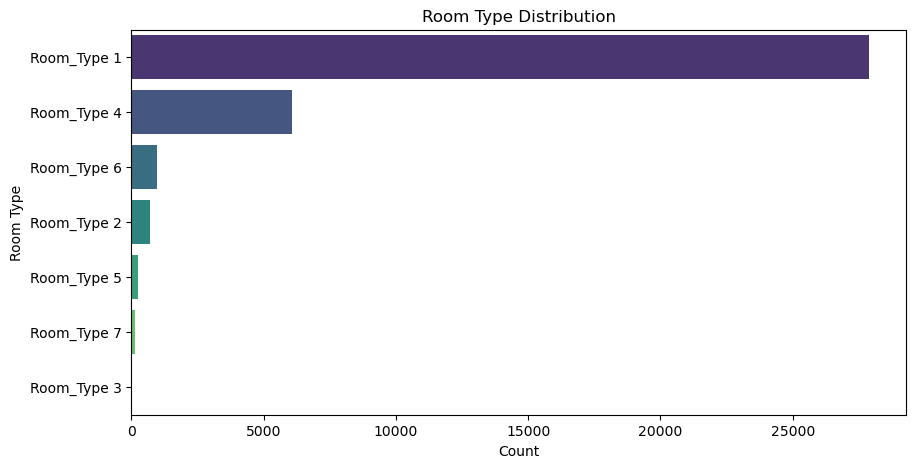

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["room type"], order=df["room type"].value_counts().index, palette="viridis")
plt.title("Room Type Distribution")
plt.xlabel("Count")
plt.ylabel("Room Type")
plt.show()

### Encoding of Categorical Variables which converts categorical variables into numeric values for model training

In [17]:
df["booking status"] = df["booking status"].map({"Canceled": 1, "Not_Canceled": 0})
df = pd.get_dummies(df, columns=["type of meal", "room type", "market segment type"], drop_first=True)
print("Categorical variables encoded successfully.")

Categorical variables encoded successfully.


### Splitting Data into Train and Test Sets, splitting into training (80%) and test (20%) sets

In [18]:
feature_cols = [col for col in df.columns if col not in ["booking status", "date of reservation"]]
X = df[feature_cols]
y = df["booking status"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (28830, 24)
Test data shape: (7208, 24)


### 1. What is the cancellation rate across different lead times?

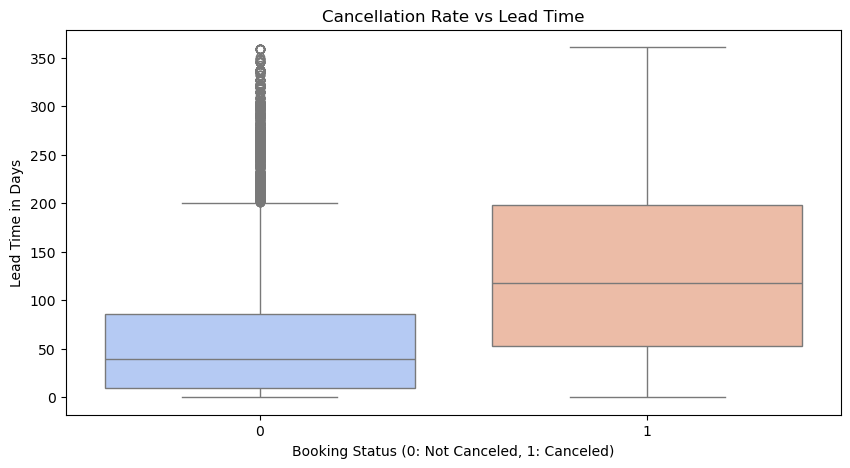

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x=y, y="lead time", palette="coolwarm")
plt.title("Cancellation Rate vs Lead Time")
plt.xlabel("Booking Status (0: Not Canceled, 1: Canceled)")
plt.ylabel("Lead Time in Days")
plt.show()

From the above boxplot we can notice that the longer the booking lead time, the higher the cancellation rate is. So, it is probably only the case that people who book well in advance who are more inclined to cancel their booking, likely as a result of altering plans and the availability of a better deal somewhere else. To minimize this trend, hotels should think over the implementation of more stringent cancellation rules or special offers can be made for early birds.

### 2. Do customers with special requests cancel less often?

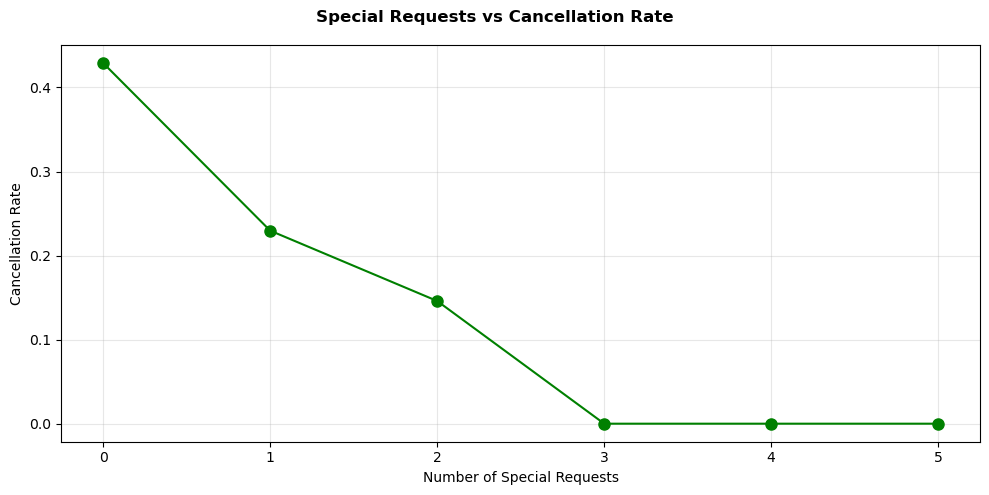

In [22]:
cancel_rate_by_requests = df[['special requests', 'booking status']].groupby('special requests').mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(cancel_rate_by_requests['special requests'], 
         cancel_rate_by_requests['booking status'], 
         color='green', 
         linestyle='-', 
         marker='o',
         markersize=8)

plt.suptitle("Special Requests vs Cancellation Rate", fontweight='bold')
plt.gca().set(xlabel='Number of Special Requests', 
             ylabel='Cancellation Rate')
plt.grid(visible=True, alpha=0.3)
plt.tight_layout()
plt.show()

From the graph, we can visually assess that guests without any special requests had the largest proportion of cancellations, at around 42%. The percentage of cancellations decreased substantially for guests with one or more special requests, at approximately 25% and 15%, respectively.  Interestingly, the cancellations rate is almost at zero for guests making three or more special requests. This information suggests that guests making special requests are more likely to honor their reservation because they must be making special requests due to needs and/or preferences. The hotel could take adavantage of this information by encouraging guests to provide their preferences early in the booking process in an effort to discourage cancellations.

### 3. Does the price per night affect cancellation rates?

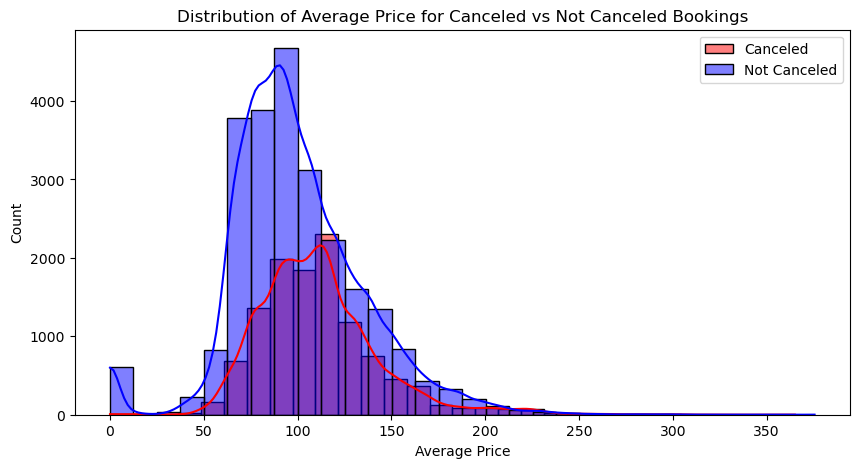

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df["booking status"] == 1]["average price"], bins=30, kde=True, color='red', label='Canceled')
sns.histplot(df[df["booking status"] == 0]["average price"], bins=30, kde=True, color='blue', label='Not Canceled')
plt.title("Distribution of Average Price for Canceled vs Not Canceled Bookings")
plt.xlabel("Average Price")
plt.ylabel("Count")
plt.legend()
plt.show()

A greater number of cancellations are seen from both ends of the price spectrum according to the graph. This might lead to the conclusion that some tourists are conservative on their budget while others are materials that are considered luxurious and they change their booking more frequently. The change of prices, the provision of discounts for longer durations of stay, and the improvement of the refund guidelines are some possible ways of reducing the cancellations in these cases.

### 4. Does having a car parking space reduce cancellation rates?

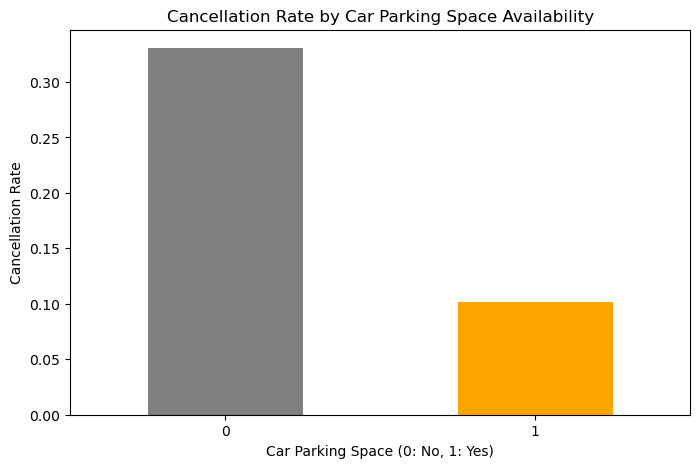

In [24]:
cancellation_by_parking = df.groupby("car parking space")["booking status"].mean()
plt.figure(figsize=(8, 5))
cancellation_by_parking.plot(kind='bar', color=['gray', 'orange'])
plt.title("Cancellation Rate by Car Parking Space Availability")
plt.xlabel("Car Parking Space (0: No, 1: Yes)")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=0)
plt.show()

As we can see from the graph, people who opted for a parking space had a lower cancellation rate (around 10%) than the ones who did not book a parking space (around 35%). Thus, it can be inferred that guests who need parking spots will not cancel their booking so easily, hence, possibly being local or long-distance travellers. The hotel could offer car parking as a reward to encourage people to book in advance.

### 5. How does the market segment type affect cancellations?

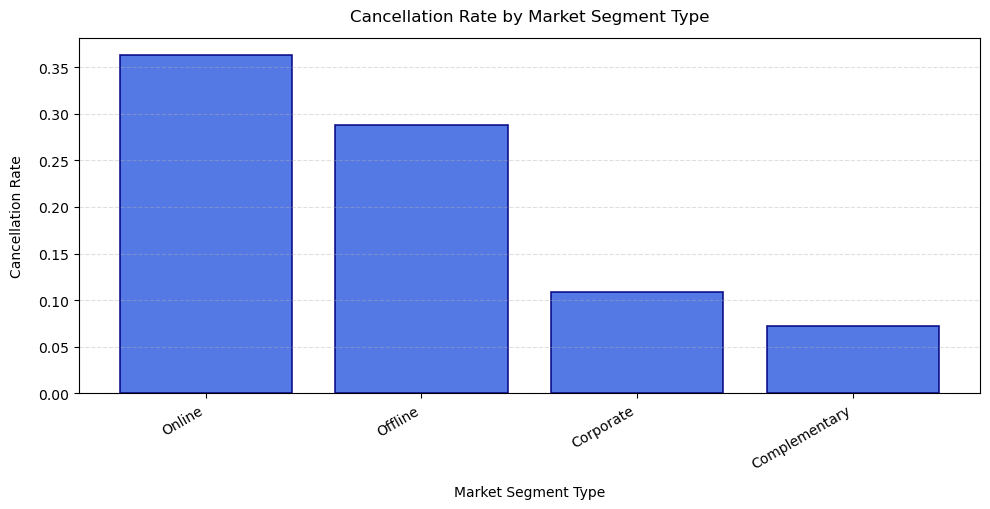

In [25]:
segment_cols = [c for c in df.columns if c.startswith('market segment type_')]

df['market_channel'] = (df[segment_cols]
                       .idxmax(axis=1)
                       .str.split('_').str[-1])

segment_rates = (df.groupby('market_channel', observed=True)['booking status']
                 .mean()
                 .sort_values(ascending=False))

fig, ax = plt.subplots(figsize=(10, 5.2))
ax.bar(segment_rates.index, segment_rates.values,
       color='#4169E1', alpha=0.9, 
       edgecolor='#000080', linewidth=1.2)

ax.set_title('Cancellation Rate by Market Segment Type', pad=12)
ax.set_xlabel('Market Segment Type', labelpad=10)
ax.set_ylabel('Cancellation Rate', labelpad=10)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

As we can see from the plot that the cancellation rates differ vastly by market segments. Complimentary has the lowest cancellation rate, while corporate bookings were second lowest. Offline bookings are at a moderate high, and online bookings have the highest cancellation rate. This suggests online customers are more prone to cancel than other segments. This might be due to flexible cancellation policies or impulsive behavior. Hotels might want to look at stricter policies or incentivization methods to lower cancellation in the online segment.

### 6. Does the number of previous bookings (repeat guests) impact cancellation rates?

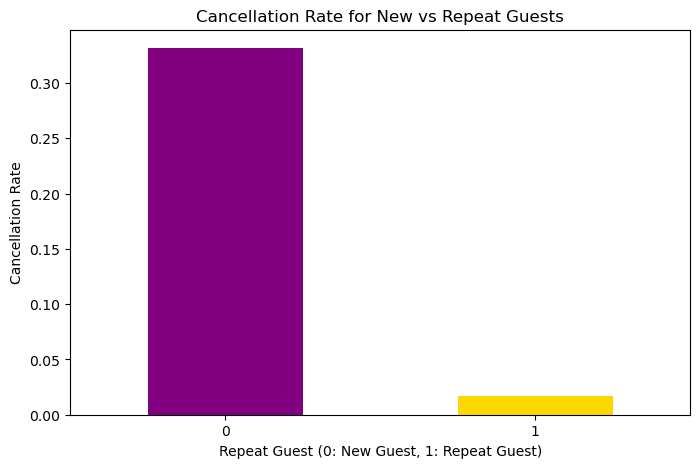

In [26]:
repeat_guest_cancellation = df.groupby("repeated")["booking status"].mean()
plt.figure(figsize=(8, 5))
repeat_guest_cancellation.plot(kind='bar', color=['purple', 'gold'])
plt.title("Cancellation Rate for New vs Repeat Guests")
plt.xlabel("Repeat Guest (0: New Guest, 1: Repeat Guest)")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=0)
plt.show()

The bar graph clearly shows that new guests are the most likely to cancel, while repeat guests hardly ever cancel. This indicates that repeat guests are highly reliable, making them a valuable customer segment. The hotel can introduce the "loyalty program" to repeat-guests and give them more discounts or exclusive deals to show that we are still committed to this commitment and that we are still doing our best to mitigate rebates to the new customers.

## Conclusion

### Strengths & Limitations of the Analysis

This exploratory data analysis on hotel booking data gave us useful info on booking trends and why people cancel. The strengths of our analysis include:  
✅ Thorough Data Cleaning – We fixed missing values, outliers, and duplicates to make sure our data was high-quality data.  
✅ Clear Business Insights – We spotted what makes people cancel, like how far ahead they book, the price, and any special asks.  
✅ Effective Data Visualization – We used easy-to-get graphs communicate findings in an easy-to-understand manner.

However, there are some limitations:  
🔸 Our data doesn't tell us about the customers demographics or reasons for cancellations, which could provide deeper insights.  
🔸 The analysis is based on historical data, so things might change in the future because of stuff like economic shifts or new travel policies.  
🔸 We found some patterns, but this is not a predictive model. so further machine learning models would be needed for cancellation prediction.

### Key Insights & Business Implications

📌 Bookings with long lead times are more likely to be canceled.
→ To avoid losing money from these early bookings, the hotel can offer special deals. These deals could include discounts that can't be refunded or options to rebook easily.  
📌 Customers with more special requests tend to cancel less.
→ People who personally tailor their stay feel more connected. Hotels can do this by creating options for special services that can be used for the purpose of customer retention.  
📌 Different room types have higher cancellation rates.
→ That situation informs us about the prices that might be too high. In that case, the hotel can manipulate the prices or carry out the overbooking of some rooms to prevent predicted cancellations.  
📌 Cancellation cases occur at different rates, depending on the market segment.
→ The reservations that are made online have a higher cancelation rate compared to in-person bookings. Thus the hotel can conduct an analysis of the refund policies for each platform used for booking to avoid huge losses.

### Data-Driven Recommendations for the Hotel

💡 Implement some promotions such as Tiered offers - Allowing for the flexibility of non-refundable bookings while at the same time offering discounts.  
💡 Optimize room allocation - Based on the insights of room types and customer segments. This will thus help to adjust the overbooking methods and thus reduced losses from revenue.  
💡 The travel agency can encourage customers to book personalized trips that will be a wonderful and unique experience for them both and they will be a truly memorable trip for them when they decide to book a ticket to that lovely place. Travel agents can also suggest particular leisure and entertainment activities.  
💡 Future Steps: Develop a Predictive Model – With the current analysis, the hotel can build a machine learning model. This model will predict which reservations might be canceled. By doing this, the hotel can manage bookings better and in advance.

Implementing these strategies will allow the hotel to decrease financial uncertainty, strengthen room occupancy rates, and as a result, enhance customer satisfaction.